# Crime Analysis in Chicago (2001 vs. 2018)

## Descriptive Data Analysis

### Setup

In [1]:
# Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30, 15) #increase figure size

In [ ]:
# Load all datasets
df_2003 = pd.read_csv("data/crime_2003.csv")
df_2003.name = "Crime in 2003"
df_2003.year = "2003"

df_2007 = pd.read_csv("data/crime_2007.csv")
df_2007.name = "Crime in 2007"
df_2007.year = "2007"

df_2016 = pd.read_csv("data/crime_2016.csv")
df_2016.name = "Crime in 2016"
df_2016.year = "2016"

datasets = [df_2003,
            df_2007,
            df_2016]

df_2008 = pd.read_csv("data/crime_2008.csv")
df_2008.name = "Crime in 2008"
df_2008.year = "2008"

df_2009 = pd.read_csv("data/crime_2009.csv")
df_2009.name = "Crime in 2009"
df_2009.year = "2009"

df_2010 = pd.read_csv("data/crime_2010.csv")
df_2010.name = "Crime in 2010"
df_2010.year = "2010"

df_2011 = pd.read_csv("data/crime_2011.csv")
df_2011.name = "Crime in 2011"
df_2011.year = "2011"

df_2012 = pd.read_csv("data/crime_2012.csv")
df_2012.name = "Crime in 2012"
df_2012.year = "2012"


datasets_by_area = [df_2008,
                    df_2009,
                    df_2010,
                    df_2011,
                    df_2012]

### Size

In [ ]:
for dataset in datasets:
    print("Dataset: {}, Shape: {}".format(dataset.name, dataset.shape))
    print("test")

### Missingness

In [ ]:
for dataset in datasets:
    print("Dataset: {}".format(dataset.name))
    print(dataset.isnull().sum())
    print('\n')

### Remove rows with missing values

In [ ]:
for dataset in datasets:
    dataset.dropna(inplace=True)
    
for dataset in datasets_by_area:
    dataset.dropna(inplace=True)

In [ ]:
for dataset in datasets:
    dataset.drop(columns=['ID', 'Case Number', 'Block', 'IUCR', 'Beat', 'Ward', 'FBI Code', 'Updated On', 'Latitude', 'Longitude'], axis=1, inplace=True)

for dataset in datasets_by_area:
    dataset.drop(columns=['ID', 'Case Number', 'Block', 'IUCR', 'Beat', 'Ward', 'FBI Code', 'Updated On', 'Latitude', 'Longitude'], axis=1, inplace=True)

### Number of crimes per year

In [ ]:
years = []
data_len = []
for dataset in datasets:
    years.append(dataset.year)
    data_len.append(len(dataset))

df_num = pd.DataFrame({'Year': years,'Num Crimes': data_len}).set_index('Year')
df_num.plot(kind='bar', rot=0);

In [ ]:
print("this is a test - github pls work")

### Crime per community area (2003, 2007, 2016)

In [ ]:
df_areas = pd.DataFrame()
df_areas['2003'] = df_2003['Community Area'].value_counts()
df_areas['2007'] = df_2007['Community Area'].value_counts()
df_areas['2016'] = df_2016['Community Area'].value_counts()
df_areas.plot(kind='bar', rot=90);

## Latitude & Longtitude

In [ ]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
crs={'init':'epsg:4326'}

# zip the Longtitude and Latitude together. Each point represents a row in Data frame
Geo_2003= [Point(xy) for xy in zip (df_2003["X Coordinate"],df_2003["Y Coordinate"])]
Geo_2007= [Point(xy) for xy in zip (df_2007["X Coordinate"],df_2007["Y Coordinate"])]
Geo_2016= [Point(xy) for xy in zip (df_2016["X Coordinate"],df_2016["Y Coordinate"])]

Geo_df_2003= gpd.GeoDataFrame(df_2003,crs=crs,geometry=Geo_2003)
Geo_df_2007= gpd.GeoDataFrame(df_2007,crs=crs,geometry=Geo_2007)
Geo_df_2016= gpd.GeoDataFrame(df_2016,crs=crs,geometry=Geo_2016)

In [ ]:
fig,ax= plt.subplots(figsize=(8,8))
Geo_df_2003.plot(ax=ax,markersize=0.25)
ax.set_title('Crimes happened in Chicago in 2003')

In [ ]:
fig,ax= plt.subplots(figsize=(8,8))
Geo_df_2007.plot(ax=ax,markersize=0.25)
ax.set_title('Crimes happened in Chicago in 2007')
plt.show()

In [ ]:
fig,ax= plt.subplots(figsize=(8,8))
Geo_df_2016.plot(ax=ax,markersize=0.25)
ax.set_title('Crimes happened in Chicago in 2016')
plt.show()

In [ ]:
## You can change Primary Type to see different types.

In [ ]:
fig,ax= plt.subplots(figsize=(8,8))
Geo_df_2003[Geo_df_2003['Primary Type']=='THEFT'].plot(ax=ax,markersize=0.25)
ax.set_title('Homicide happened in Chicago in 2003')

In [ ]:
fig,ax= plt.subplots(figsize=(8,8))
Geo_df_2007[Geo_df_2007['Primary Type']=='THEFT'].plot(ax=ax,markersize=0.25)
ax.set_title('Homicide happened in Chicago in 2007')

In [ ]:
fig,ax= plt.subplots(figsize=(8,8))
Geo_df_2016[Geo_df_2016['Primary Type']=='THEFT'].plot(ax=ax,markersize=0.25)
ax.set_title('Homicide happened in Chicago in 2016')

## Choropleth 

In [ ]:
fd='data/PoliceDistrict copy.shp'
map_Chicago=gpd.read_file(fd)
map_Chicago.drop(columns=['DIST_LABEL'],inplace=True)
map_Chicago["DIST_NUM"]=map_Chicago["DIST_NUM"].apply(pd.to_numeric)

district_2003=pd.DataFrame(df_2003['District'].value_counts())
district_2007=pd.DataFrame(df_2007['District'].value_counts())
district_2016=pd.DataFrame(df_2016['District'].value_counts())


district_2003=district_2003.reset_index().rename(columns={'index':'DIST_NUM','District':'CRIME_NUM'})
district_2007=district_2007.reset_index().rename(columns={'index':'DIST_NUM','District':'CRIME_NUM'})
district_2016=district_2016.reset_index().rename(columns={'index':'DIST_NUM','District':'CRIME_NUM'})

map_2003=map_Chicago.merge(district_2003,on='DIST_NUM')
map_2007=map_Chicago.merge(district_2007,on='DIST_NUM')
map_2016=map_Chicago.merge(district_2016,on='DIST_NUM')



In [ ]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = (25, 10) #increase figure size

In [ ]:
fig, axs = plt.subplots(1,3)

sm = plt.cm.ScalarMappable(cmap='Greens')
sm._A = []
cbar = fig.colorbar(sm)
ax.axis('off')
ax.set_title('Crime happened in Chicago in 2003')


map_2003.plot(column="DIST_NUM", cmap='Greens', linewidth=0.8, ax=axs[0], edgecolor='0.6')
map_2007.plot(column="DIST_NUM", cmap='Greens', linewidth=0.8, ax=axs[1], edgecolor='0.6')
map_2016.plot(column="DIST_NUM", cmap='Greens', linewidth=0.8, ax=axs[2], edgecolor='0.6')


## Get Data

In [2]:
df_2003 = pd.read_pickle("./data/crime_2003.pkl")
df_2003.name = "Crime in 2003"
df_2003.year = "2003"

df_2007 = pd.read_pickle("./data/crime_2007.pkl")
df_2007.name = "Crime in 2007"
df_2007.year = "2007"

df_2016 = pd.read_pickle("./data/crime_2016.pkl")
df_2016.name = "Crime in 2016"
df_2016.year = "2016"

datasets = [df_2003,
            df_2007,
            df_2016]

df_2008 = pd.read_pickle("./data/crime_2008.pkl")
df_2008.name = "Crime in 2008"
df_2008.year = "2008"

df_2009 = pd.read_pickle("./data/crime_2009.pkl")
df_2009.name = "Crime in 2009"
df_2009.year = "2009"

df_2010 = pd.read_pickle("./data/crime_2010.pkl")
df_2010.name = "Crime in 2010"
df_2010.year = "2010"

df_2011 = pd.read_pickle("./data/crime_2011.pkl")
df_2011.name = "Crime in 2011"
df_2011.year = "2011"

df_2012 = pd.read_pickle("./data/crime_2012.pkl")
df_2012.name = "Crime in 2012"
df_2012.year = "2012"

datasets_by_area = [df_2008,
                    df_2009,
                    df_2010,
                    df_2011,
                    df_2012]

In [4]:
# Combine datasets
df_2008_2012 = pd.concat(datasets_by_area)

# Get count of number of crimes
df_2008_2012['Num Crimes'] = 1

# Drop unnecessary columns
df_2008_2012.drop(columns=['Arrest', 'Domestic', 'District', 'X Coordinate', 'Y Coordinate', 'Year'], axis=1, inplace=True)

# Read in income data
df_income = pd.read_csv("./data/Per_Capita_Income.csv", index_col=0)
df_income.index.names = ['Community Area']
"""
# Group by community area
df_2008_2012 = df_2008_2012.groupby(['Community Area']).sum()

# Drop unnecessary first row
df_2008_2012.drop([0], inplace=True)



# Join Dataframes
df_2008_2012 = df_2008_2012.join(df_income, how='outer')
df_2008_2012.columns

# Rename column (to remove space)
df_2008_2012.rename(columns={"PER CAPITA INCOME ": "PER CAPITA INCOME"}, inplace=True)"""

'\n# Group by community area\ndf_2008_2012 = df_2008_2012.groupby([\'Community Area\']).sum()\n\n# Drop unnecessary first row\ndf_2008_2012.drop([0], inplace=True)\n\n\n\n# Join Dataframes\ndf_2008_2012 = df_2008_2012.join(df_income, how=\'outer\')\ndf_2008_2012.columns\n\n# Rename column (to remove space)\ndf_2008_2012.rename(columns={"PER CAPITA INCOME ": "PER CAPITA INCOME"}, inplace=True)'

In [14]:
# Groupby Crime Type & Community area
df_2008_2012_crime={}

for crime_type in list(set(df_2008_2012['Primary Type'])):
    df_2008_2012_crime.update({crime_type:df_2008_2012[df_2008_2012['Primary Type']==crime_type].groupby(['Community Area']).sum()})
    df_2008_2012_crime[crime_type]=df_2008_2012_crime[crime_type].join(df_income,how='outer')
    df_2008_2012_crime[crime_type].rename(columns={'Num Crimes':'NUM',"PER CAPITA INCOME ":'INCOME',"HARDSHIP INDEX":"HARDSHIP_INDEX"}, inplace=True)
    df_2008_2012_crime[crime_type]=df_2008_2012_crime[crime_type].join(pd.DataFrame({'INCOME10':np.log10(df_2008_2012_crime[crime_type]['INCOME'])}))
    df_2008_2012_crime[crime_type].dropna(inplace=True)
    
    
for crime_type in list(set(df_2008_2012['Primary Type'])):
    try: 
        df_2008_2012_crime[crime_type].drop([0], inplace=True)
    except:
        pass
    

In [5]:
#Groupby All Data 
# Group by community area
df_2008_2012_all = df_2008_2012.groupby(['Community Area']).sum()

# Drop unnecessary first row
df_2008_2012_all.drop([0], inplace=True)

# Join Dataframes
df_2008_2012_all = df_2008_2012_all.join(df_income, how='outer')

df_2008_2012_all.rename(columns={'Num Crimes':'NUM',"PER CAPITA INCOME ":'INCOME',"HARDSHIP INDEX":"HARDSHIP_INDEX"}, inplace=True)

df_2008_2012_all=df_2008_2012_all.join(pd.DataFrame({'INCOME10':np.log10(df_2008_2012_all['INCOME'])}))

df_2008_2012_all.dropna(inplace=True)
  

In [6]:
import patsy
import statsmodels.api as sm

In [8]:
a,b,c=np.polyfit(df_2008_2012_all['INCOME'],df_2008_2012_all['NUM'], 2)

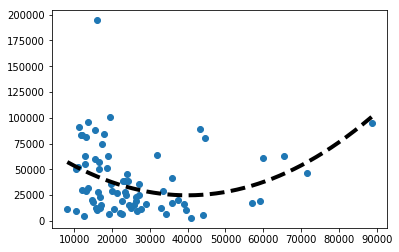

In [10]:
plt.scatter(df_2008_2012_all['INCOME'],df_2008_2012_all['NUM'])
xs = np.arange(df_2008_2012_all['INCOME'].min(), df_2008_2012_all['INCOME'].max())
ys = a * (xs**2) + b*xs+c
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

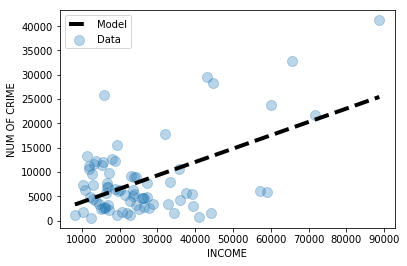

In [33]:

# Plot the orginal data (as before)
plt.scatter(df_2008_2012_crime['THEFT']['INCOME'], df_2008_2012_crime['THEFT']['NUM'], alpha=0.3, label='Data', s=100);

# Generate and plot the model fit line
xs = np.arange(df_2008_2012_crime['THEFT']['INCOME'].min(), df_2008_2012_crime['THEFT']['INCOME'].max())
ys =0.2748  * xs +  1092.4920  
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('INCOME')
plt.ylabel('NUM OF CRIME')
plt.legend();

In [32]:
outcome, predictors = patsy.dmatrices('NUM ~ INCOME', df_2008_2012_crime['THEFT'])
mod = sm.OLS(outcome, predictors)
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    NUM   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     30.32
Date:                Tue, 14 May 2019   Prob (F-statistic):           4.92e-07
Time:                        17:47:05   Log-Likelihood:                -786.06
No. Observations:                  77   AIC:                             1576.
Df Residuals:                      75   BIC:                             1581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1092.4920   1483.952      0.736      0.4

In [ ]:
Crime_R_Square={}

In [ ]:
outcome, predictors = patsy.dmatrices('Num ~ Income10', df_2008_2012)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

## look at the results
print(res.summary())